# Wine reviewes & Sentiment analysis
This notebook is only meant as a demonstration of sentiment analysis (SA) and linear regression and how they can be used in text analysis and predictive analytics. Further ideas for tackling the dataset is given in the conclusion.

# Table of Contents
1. [Introduction](#1)
2. [Conclusion](#conclusion)
3. [Packages and Data](#init)
4. [Visualizing Data](#visualizing)
5. [Sentiment analysis](#sentiment)
6. [Model](#model)

### Sentiment analysis in a nutshell <a id="1"/>
SA is a form of Machine Learning / AI. The goal of SA is to determine what the writer of af text thinks about a given object. The ratio of positive to negative words in a text is used to determine the texts polarity (positive vs. negative) and subjectivity (stating facts vs. oppinions)

### Data
[kaggle.com/zynicide/wine-reviews](https://www.kaggle.com/zynicide/wine-reviews) (credit: [zackthoutt](https://www.kaggle.com/zynicide))
- 130k reviews scraped from [WineEnthusiast](https://www.winemag.com/?s=&drink_type=wine). Reviews are heavily skewed as only wines scoring 80+ points are included - which might affect the predictive powers of the model.
- The dataset includes a range of features like winery and type of grape, but here we will only use the wine reviewers description and scoring of the wine

## Conclusion <a id="conclusion"/>
Polarity alone does not seem to have a lot of predictive power in the model. Interesting next steps could be adding additional features, or turning the analysis into a classification problem by grouping point-scores and changing to a classification algorithms.

Another interesting way to tackle the dataset could be from a taste-profiling / -preference angle. An approch to this would be clustering simular tastes/smells of a wine. Then trying to classify a winetasters taste given how he rated / described different types of wine.

### Importing packages and loading data <a id="init"/>

In [1]:
import pandas as pd # data wrangling and processing
print("pandas version: {}". format(pd.__version__))

import matplotlib # data visualization
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))

import textblob # sentiment extraction
from textblob import TextBlob
print("textblob version: {}". format(textblob.__version__))

import sklearn # machine learning algorithms and helper functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("scikit learn version: {}". format(sklearn.__version__))

pandas version: 0.23.0
matplotlib version: 2.2.2
textblob version: 0.15.2
scikit learn version: 0.19.1


In [2]:
# loading data
data = pd.read_csv('winemag-data-130k-v2.csv')

## Adding Polarity and Subjectivity features to data <a id="sentiment"/>

In [3]:
polarity = []
subjectivity = []
for i in data['description']:
    polarity.append(TextBlob(i).sentiment.polarity)
    subjectivity.append(TextBlob(i).sentiment.subjectivity)
    
data['polarity'] = polarity
data['subjectivity'] = subjectivity

In [34]:
# example of description with subjectivity = 1
data['description'].loc[data['subjectivity'] == 1][13]

'This is dominated by oak and oak-driven aromas that include roasted coffee bean, espresso, coconut and vanilla that carry over to the palate, together with plum and chocolate. Astringent, drying tannins give it a rather abrupt finish.'

In [38]:
#### example of description with subjectivity = 0
data['description'].loc[data['subjectivity'] == 0][338]

'The wine is earthy and somewhat rustic. There is fruit but it is spoiled by a spicy pepper edge. Chill this drastically.'

In [36]:
#### example of description with polarity = 0
data['description'].loc[data['polarity'] == 0][107]

'Aromas of yellow stone fruit, white spring flower and a whiff of citrus lift out of the glass. The soft round palate offers ripe apricot, yellow peach and a hint of candied nectarine zest.'

In [28]:
#### example of description with polarity = 1
data['description'].loc[data['polarity'] == 1][1340]

'Produced from organic grapes, the wine is ripe and packed with fruit. It has a delicious line of acidity, as well as weight and peach and red-fruit flavors. The acidity keeps the exuberance in check. Drink now.'

## Visualizing data <a id="visualizing"/>

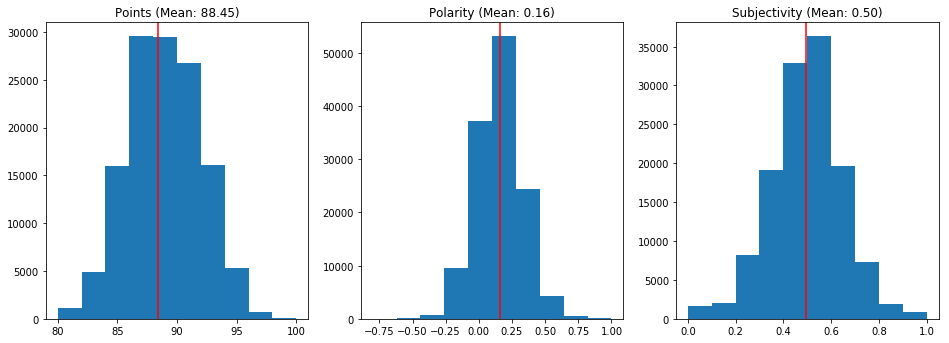

In [4]:
plt.figure(figsize=[16,12])

plt.subplot(231)
x = data['points']
plt.title('Points (Mean: {:.2f})'.format(x.mean()))
plt.hist(x)
plt.axvline(x.mean(), color='red')

plt.subplot(232)
x = data['polarity']
plt.title('Polarity (Mean: {:.2f})'.format(x.mean()))
plt.hist(x)
plt.axvline(x.mean(), color='red')

plt.subplot(233)
x = data['subjectivity']
plt.title('Subjectivity (Mean: {:.2f})'.format(x.mean()))
plt.hist(x)
plt.axvline(x.mean(), color='red')

plt.show()

Both target and features seems to be fairly normally distributed. We can observe that the subjectivity is centered around 0.5 meaning we should be able to extract some oppinions from the text.

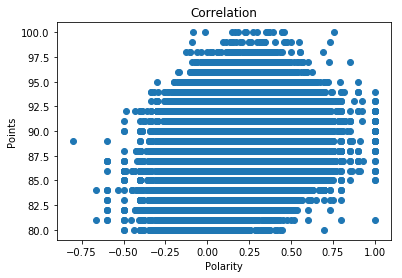

In [5]:
plt.scatter(x = data['polarity'],y=data['points'])
plt.title('Correlation')
plt.xlabel('Polarity')
plt.ylabel('Points')
plt.show()

There seems to be a positive correlation between the polarity and the point scoring but not very clear. Lets focus on the reviews with a high degree of subjectivity, given by a subjectivity score of 1

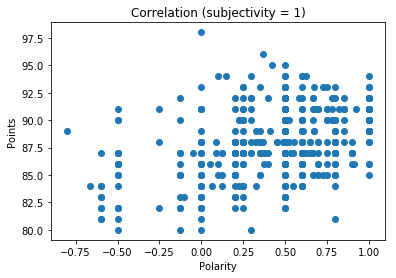

In [6]:
plt.scatter(x = data['polarity'].loc[data['subjectivity'] == 1],y=data['points'].loc[data['subjectivity'] == 1])
plt.title('Correlation (subjectivity = 1)')
plt.xlabel('Polarity')
plt.ylabel('Points')
plt.show()

## Model <a id="model"/>

In [7]:
# define y variable
data_y = ['points']

# define x variables
data_x = ['polarity']

# splitting data for cross validation purposes
train_x, test_x, train_y, test_y = train_test_split(data[data_x].loc[data['subjectivity'] == 1], data[data_y].loc[data['subjectivity'] == 1], random_state=0)

In [13]:
# Introducing the constraint on subjectivity has greatly reduced the sample size
print("Data Shape: {}".format(data.shape))
print("Train Shape: {}".format(train_x.shape))
print("Test Shape: {}".format(test_x.shape))

Data Shape: (129971, 16)
Train Shape: (355, 1)
Test Shape: (119, 1)


In [9]:
# training the model
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# getting model parameters
print("Model: {:.2f}x".format(reg.coef_[0][0]) + " + {:.2f}".format(reg.intercept_[0]) + "\n")

# evaluating model
print("Models predictive power: {:.2f}".format(reg.score(test_x, test_y)))

Model: 3.33x + 86.44

Models predictive power: 0.11
